Beta-Delta-Delta Dynamics
=========================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

%matplotlib inline

In [2]:
"""
    Define market with linear demand.
    Market is characterized by demand function, which is characterized by A and b
    Right now we assume a simplt to player market.
"""
n = 2
A = np.matrix('-3 -2; -1, -3')
B = np.matrix('6;6')

In [3]:
"""
    Describes the evolition of the system.
    Here x1 and barx2 evolve by only looking at indiviudal profits
    dx2 evolves to maximize difference between sidepayment and losses.
    beta evolves to with the loose assumption that deltax2 is at opitmum,
        which allows for a single expression for (d dx2/d beta)
    Vector order [barx1, barx2, dx1, dx2, beta]
"""
def dynamics( x, t ):
    x = np.matrix(x).T
    J = np.matrix('-6 -2 0 0 0; -1 -6 0 0 0')
    x_dot = J*x + B

    dx2_opt = ( x[4]*A[0,1]*(x[0] + x[2]) + (2*A[1,1]*x[1] + A[1,0]*(x[0] + x[2]) + B[1]) )/(-2*A[1,1])
    beta_opt = (-(A[1,0]*(x[0] + x[2]) + 2*A[1,1]*x[1] + B[1])/(2*(x[0] + x[2] )*A[0,1])) + 0.5
    #Simple x1 dynamics that do not take into account the effect of dx1 on dx2
    #dx1_dot = (1-x[4])*x[3]*A[0,1] + (2*A[0,0]*(x[0] + x[2]) + A[0,1]*(x[1] + x[3]) + B[0] )
    
    #Complex dyanmics, which take into account effect of dx1 on dx2.
    #when this effect is considered, the relationship between dv1 and dx1 is not linear or quadratic.
    #If this dynamics don't behave nicely, considered aproximating relationship with quadratic
    #(Series expansion)
    
    #WRONG
    #Check that I've coded it up correctly [ ]
    #Check that the math is correct [ ]
    #If still wrong,aproximate with quadratic
    temp1 = ( (1 - beta_opt)*(x[4]*A[0,1] + A[1,0])/(-2*A[1,1]) ) - dx2_opt*(2*A[1,1]*x[1] + B[1]) / (2*A[0,1]*(x[0] + x[2])**2)
    temp2 = (1 - beta_opt)*dx2_opt*A[0,1] + temp1*(x[0] + x[2])*A[0,1]
    dx1_dot = (2*A[0,0]*(x[0] + x[2]) + A[0,1]*(x[1] + x[3]) + B[0] ) + temp2
    dx2_dot = x[4]*A[0,1]*(x[0] + x[2]) + (2*A[1,1]*(x[1] + x[3]) + A[1,0]*(x[0] + x[2]) + B[1] )
    
    #dx2_opt = 1
    beta_dot = -1*((x[0]+x[2])*dx2_opt*A[0,1]) + ((A[0,1]*(x[0] + x[2]))**2)*(1-x[4])/(-2*A[1,1])
    x_dot = x_dot.reshape(2,).tolist()[0]
    
    #multiplicative constant
    c = 1.0
    x_dot.append(c*dx1_dot[0,0])
    x_dot.append(c*dx2_dot[0,0])
    x_dot.append(c*beta_dot[0,0])
    
    #check limits (though I don't think these should be necessary)
    #check that beta is between 0 and 1
    if x[4] >= 1 and x_dot[4] > 0:
        x_dot[4] = 0
    if x[4] <= 0 and x_dot[4] < 0:
        x_dot[4] = 0
    #make sure delta is not greater than x2
    #perhaps here we need to think of coeficients
    #print x_dot, x
    return x_dot

In [4]:
#x0 = [0,0,0,0,0]
x0 = [12.0/17,15.0/17,0,0,0]

t = np.linspace(0.0, 17, 14000)
x = odeint(dynamics, x0, t)

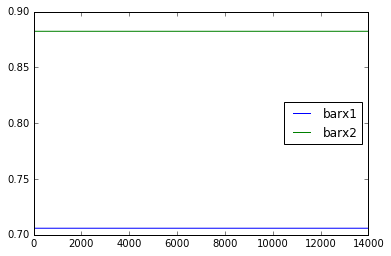

In [5]:
df = pd.DataFrame(x)
df.columns = ['barx1', 'barx2', 'dx1', 'dx2', 'beta']
df[['barx1', 'barx2']].plot()

In [6]:
df['x1'] = df['barx1'] + df['dx1']
df['x2'] = df['barx2'] + df['dx2']
df['p1sur'] = (df['x1']*A[0,1]*df['dx2'])
df['Pi1NC']  = df['x1']*(A[0,0]*df['x1'] + A[0,1]*df['barx2'] + B[0,0])

In [7]:
df['V1'] = df['Pi1NC'] + (1 - df['beta'])*df['p1sur']
df['V2'] = df['x2']*(A[1,0]*df['x1'] + A[1,1]*df['x2'] + B[1,0]) + df['beta']*(df['p1sur'])
df['sw'] = df['V1'] + df['V2']

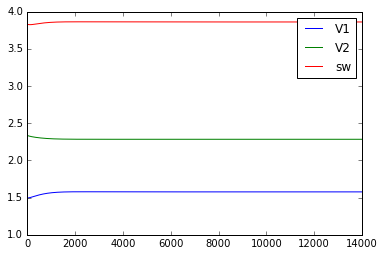

In [8]:
df[['V1', 'V2', 'sw']].plot()

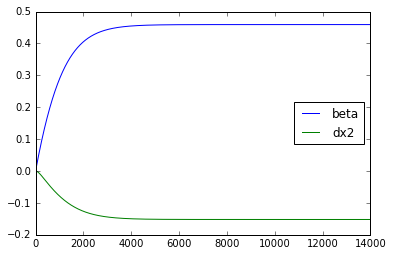

In [9]:
df[['beta', 'dx2']].plot()

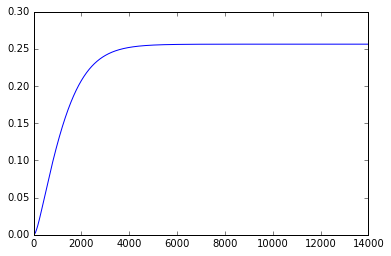

In [10]:
df['p1sur'].plot()

In [11]:
df[['V1', 'V2', 'sw', 'p1sur', 'beta', 'dx1', 'dx2', 'x2', 'x1']].tail(4)

,V1,V2,sw,p1sur,beta,dx1,dx2,x2,x1
13996,1.576854,2.283825,3.860679,0.25623,0.459308,0.137231,-0.151955,0.730398,0.843113
13997,1.576854,2.283825,3.860679,0.25623,0.459308,0.137231,-0.151955,0.730398,0.843113
13998,1.576854,2.283825,3.860679,0.25623,0.459308,0.137231,-0.151955,0.730398,0.843113
13999,1.576854,2.283825,3.860679,0.25623,0.459308,0.137231,-0.151955,0.730398,0.843113
